In [1]:
#import all the libraries required 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
#importing dataset
df=pd.read_csv("C:/Users/gargd/Desktop/Fraud.csv")

In [3]:
#displaying the first five entries of the data frame
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
#confirming the rows and columns size
df.shape

(6362620, 11)

In [5]:
#detail information for the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
# Check for duplicate rows
print(df.duplicated().sum())
#no duplicate rows found

0


# Now we will perform our first step of Data cleaning including missing values, outliers and multi-collinearity

In [7]:
#Check for missing values: in our dataframe
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
#Heatmap for null values
sns.heatmap(df.isna())

In [8]:
# Check for outliers in the amount column
print(df.amount.describe())

count    6.362620e+06
mean     1.798619e+05
std      6.038582e+05
min      0.000000e+00
25%      1.338957e+04
50%      7.487194e+04
75%      2.087215e+05
max      9.244552e+07
Name: amount, dtype: float64


# Outliers are extreme values that stand out greatly from the overall pattern of values in a dataset

In [9]:
#removing the outliers where the amount value is less than or equal to the 99th percentile value q 
q = df.amount.quantile(0.99)
df = df[df.amount <= q]

In [17]:
#names in these columns are likely to be unique for each transaction,
#and having them in the dataset may introduce noise and make the analysis more complex. 
df.drop(["nameOrig","nameDest"],axis=1,inplace=True)

In [18]:
#check for high correlations between independent variables
df.corr()

C:\Users\gargd\AppData\Local\Temp\ipykernel_12812\2406637621.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,-0.012727,-0.009936,-0.009616,0.023121,0.017600,0.027576,0.001104
amount,-0.012727,1.000000,0.023821,0.028167,0.181389,0.230179,0.042636,0.002107
oldbalanceOrg,-0.009936,0.023821,1.000000,0.999406,0.077195,0.056980,-0.004710,0.000637
newbalanceOrig,-0.009616,0.028167,0.999406,1.000000,0.078929,0.057540,-0.009239,0.000623
oldbalanceDest,0.023121,0.181389,0.077195,0.078929,1.000000,0.995219,-0.005019,-0.000267
newbalanceDest,0.017600,0.230179,0.056980,0.057540,0.995219,1.000000,-0.003692,-0.000284
isFraud,0.027576,0.042636,-0.004710,-0.009239,-0.005019,-0.003692,1.000000,0.025298
isFlaggedFraud,0.001104,0.002107,0.000637,0.000623,-0.000267,-0.000284,0.025298,1.000000


C:\Users\gargd\AppData\Local\Temp\ipykernel_12812\938189965.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,fmt=".2f")


<Axes: >

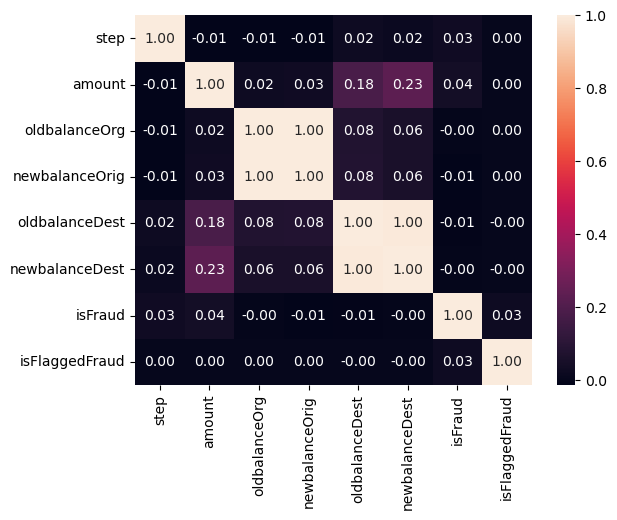

In [19]:
sns.heatmap(df.corr(),annot=True,fmt=".2f")

In [20]:
#removing the isflaggedfraud attribute as it have less dependency 
df.drop(["isFlaggedFraud"],axis=1,inplace=True)

In [21]:
#now our data is cleaned:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


# To imporve the accuracy we will use labelhot encoding and standard scaling
labelhot encoding to convert the categorical data into numeric form
standard scaling to lie the dataframe values between 0 to 1 which will help model to be more accurate

In [22]:
#importing library
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [29]:
#creating the object of label encoder
le=LabelEncoder()

In [30]:
#checking how many categorical values in the type feature
df['type'].value_counts()

CASH_OUT    2236468
PAYMENT     2151495
CASH_IN     1399279
TRANSFER     470319
DEBIT         41432
Name: type, dtype: int64

In [33]:
#fitting and transforming the values
le.fit_transform(df['type'])

array([3, 3, 4, ..., 1, 4, 1])

In [34]:
df['type']=le.fit_transform(df['type'])

In [35]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1
3,1,1,181.00,181.0,0.00,21182.0,0.0,1
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0


# we will use Logistic Regression - 
A simple and interpretable model that can work well with binary classification problems, such as fraud detection.

In [37]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1
3,1,1,181.00,181.0,0.00,21182.0,0.0,1
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0


In [38]:
#in this step we have distributed the data to predict the model as the transaction will comes under fraud or not 
x=df.drop(['isFraud'],axis=1)
y=df['isFraud']

In [39]:
#now splitting the data into training and testing
from sklearn.model_selection import train_test_split

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=46)

In [41]:
#training and testing data size
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5039194, 7)
(5039194,)
(1259799, 7)
(1259799,)


# Standard scaling


In [43]:
#creating the object of standard scaler 
ss=StandardScaler()

In [44]:
x_train

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
3078768,235,1,290943.38,0.00,0.00,2403029.93,2693973.31
5378020,376,1,193774.39,52912.34,0.00,1811725.95,2005500.34
1413686,139,1,191066.21,79072.00,0.00,82176.82,273243.02
2610619,208,1,535401.83,0.00,0.00,1401024.09,1936425.91
2870239,227,3,23411.94,477701.00,454289.06,0.00,0.00
...,...,...,...,...,...,...,...
4311974,308,0,416705.20,835600.44,1252305.65,436789.52,20084.32
2693323,211,3,9848.78,0.00,0.00,0.00,0.00
295245,15,3,4996.58,14763.33,9766.75,0.00,0.00
1012247,46,0,235727.01,33.00,235760.01,0.00,0.00


In [47]:
#fitting and transforming together
ss.fit_transform(x_train)

array([[-0.05625511, -0.51711558,  0.76305534, ..., -0.29398318,
         0.43335456,  0.49366875],
       [ 0.93365541, -0.51711558,  0.26514917, ..., -0.29398318,
         0.24414064,  0.27638593],
       [-0.73023674, -0.51711558,  0.25127211, ..., -0.29398318,
        -0.3093053 , -0.27031637],
       ...,
       [-1.60079634,  0.97833494, -0.70217218, ..., -0.29065583,
        -0.33560142, -0.35655217],
       [-1.38315644, -1.26484083,  0.48011969, ..., -0.2136641 ,
        -0.33560142, -0.35655217],
       [-0.22475051, -1.26484083, -0.70329221, ...,  2.9234705 ,
        -0.30532012, -0.32819455]])

In [48]:
#importing library
from sklearn.linear_model import LogisticRegression

In [51]:
#creating object of logistic regression
lr=LogisticRegression()

In [52]:
lr.fit(x_train,y_train)

C:\Users\gargd\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
#predicting the x_train values and storing values in x_train_pred
x_train_pred=lr.predict(x_train)

In [87]:
x_train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [55]:
#importing library to check our model accuracy
from sklearn.metrics import accuracy_score

In [57]:
accuracy_score(y_train,x_train_pred)*100

99.93004833709517

In [109]:
#testing the model by giving first index location entry 
#converting the values into 1d
x=x_train.loc[3].values
x=x.reshape(1,-1)
x

array([[1.0000e+00, 1.0000e+00, 1.8100e+02, 1.8100e+02, 0.0000e+00,
        2.1182e+04, 0.0000e+00]])

In [110]:
pred=lr.predict(x)

C:\Users\gargd\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [111]:
if pred[0]==0:
    print("Transaction is not fraud.")
else:
    print("Fake Transaction")

Fake Transaction
